We will experiment with the linear advection diffusion equation
\begin{equation}
\frac{\partial u}{\partial t} =  - c\frac{\partial u}{\partial x} + \mu \frac{\partial ^2u}{\partial x^2}
\end{equation}

In [84]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [85]:
nx = 41
ny = 41
Lx = 1.0
Ly = 1.0
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
xx,yy = np.meshgrid(x,y)
dx = Lx/(nx-1)
dy = Ly/(ny-1)
assert(dx == x[1]-x[0])

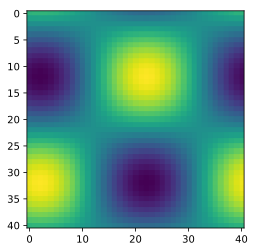

In [86]:
ω0 = 2.0*np.pi
ω1 = 2.0*np.pi
μ = 0.05
c1 = 1.0 # wave speed
c2 = 1.0 # wave speed
u0 = lambda x,y: np.sin(ω0*x)*np.cos(ω1*y)
uexact = lambda x,y,t: np.exp(-μ*(ω0*ω0 + ω1*ω1)*t)*u0(x-c1*t,y-c2*t)
plt.imshow(uexact(xx,yy,1.3))

In [92]:
dt = 0.001
tend = 1.0
t = 0

cfl1 = c1*dt/2.0/dx
cfl2 = c2*dt/2.0/dx
nfl  = μ*dt/dx/dx
sol  = []
sol.append(u0(xx,yy))

while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1,1:-1] = un[1:-1,1:-1] - cfl1 * (un[1:-1,2:] - un[1:-1,:-2]) - cfl2 * (un[2:,1:-1] - un[:-2,1:-1]) 
    + nfl*(un[1:-1,2:] - 2.0*un[1:-1,1:-1] + un[1:-1,:-2])+ nfl*(un[2:,1:-1] - 2.0*un[1:-1,1:-1] + un[:-2,1:-1])

    # periodic boundaries - do the x+ face
    s = slice(1,-1)
    unew[s,-1] = un[s,-1] - cfl1 * (un[s,1] - un[s,-2]) - cfl2 * (un[2:,-1] - un[:-2,-1]) 
    + nfl*(un[s,1] - 2.0*un[s,-1] + un[s,-2])+ nfl*(un[2:,-1] - 2.0*un[s,-1] + un[:-2,-1])
    
    unew[0,-1] = un[0,-1] - cfl1 * (un[0,1] - un[0,-2]) - cfl2 * (un[1,-1] - un[-2,-1]) 
    + nfl*(un[0,1] - 2.0*un[0,-1] + un[0,-2])+ nfl*(un[1,-1] - 2.0*un[0,-1] + un[-2,-1])
    
    unew[-1,-1] = un[-1,-1] - cfl1 * (un[-1,1] - un[-1,-2]) - cfl2 * (un[1,-1] - un[-2,-1]) 
    + nfl*(un[-1,1] - 2.0*un[-1,-1] + un[-1,-2])+ nfl*(un[1,-1] - 2.0*un[0,-1] + un[-2,-1])
    
    unew[:,0] = unew[:,-1]
    
    # periodic boundaries - do the y+ face
    s = slice(1,-1)    
    unew[-1,s] = un[-1,s] - cfl1 * (un[-1,2:] - un[-1,:-2]) - cfl2 * (un[1,s] - un[-2,s]) 
    + nfl*(un[1,s] - 2.0*un[-1,s] + un[-2,s])+ nfl*(un[-1,2:] - 2.0*un[-1,s] + un[-1,:-2])    
    
    unew[-1,0] = un[-1,0] - cfl1 * (un[1,0] - un[-2,0]) - cfl2 * (un[-1,1] - un[-1,-2]) 
    + nfl*(un[1,0] - 2.0*un[-1,0] + un[-2,0])+ nfl*(un[-1,1] - 2.0*un[-1,0] + un[-1,-2])

    unew[0,:] = unew[-1,:]
#     unew[0] = un[0] + cfl * (un[1] - un[-2])
#     unew[-1] = un[-1] - cfl * (un[1] - un[-2]) + nfl*(un[-2] - 2.0*un[-1] + un[1])   
#     unew[0] = unew[-1]
    sol.append(unew)
    t += dt

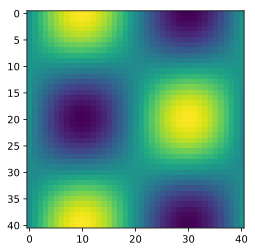

In [93]:
ims = []
fig = plt.figure()

i = 0
t = 0.0
for solution in sol:    
    if (i%10==0):        
#         im = plt.plot(x,solution,'bo', x, uexact(x,t),'-k',animated=True)
        im = plt.imshow(solution)
        ims.append([im])
    i+=1
    t += dt
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,repeat_delay=1000)
ani.save('2dftcs.mp4')    

In [94]:
%%HTML
<video  controls>
  <source src="2dftcs.mp4" type="video/mp4">
</video>

Accuracy - let's calculate the error at t = 0.5 s

In [7]:
np.floor(np.logspace(1,2,10))

array([ 10.,  12.,  16.,  21.,  27.,  35.,  46.,  59.,  77., 100.])

In [24]:
npts =np.array([11,21,41,81,161,181,191,201])
# npts = np.logspace()
dxs = L/(npts-1)
errs = []
for n in npts:
    dt = 0.0001
    L = 1.0
    x = np.linspace(0,L,n)
    dx = L/(n-1)
    cfl = c*dt/2.0/dx
    nfl = μ*dt/dx/dx    
    un = np.sin(ω*x)
    t = 0.0
    assert(dx == x[1]-x[0])
    while t < 0.5:
        unew = un.copy()
        unew[1:-1] = un[1:-1] - cfl * (un[2:] - un[:-2]) + nfl*(un[2:] - 2.0*un[1:-1] + un[:-2])        
        unew[-1] = un[-1] - cfl * (un[1] - un[-2]) + nfl*(un[-2] - 2.0*un[-1] + un[1])   
        unew[0] = unew[-1]
        un = unew.copy()
        t += dt
    print('time=',t)
    error = np.linalg.norm(unew - uexact(x,t),2)
    errs.append(error)

time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612
time= 0.5000999999999612


In [25]:
errs

[0.1896497107882626,
 0.0639995940724643,
 0.021572041718030406,
 0.007048582653741238,
 0.0034476760920930526,
 0.00350194970851379,
 0.0035642421508598108,
 0.0036404779420395063]

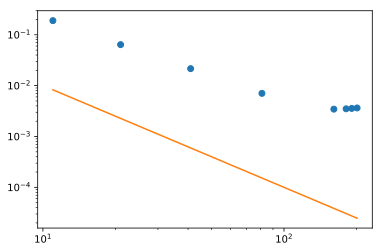

In [26]:
plt.loglog(npts,errs,'o',npts,npts**(-2.0))

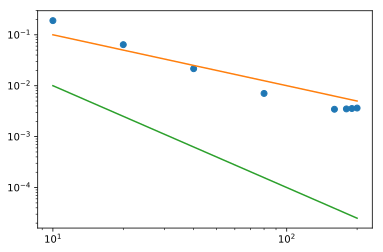

In [27]:
plt.loglog(1/dxs,errs,'o',1/dxs,dxs,1/dxs,dxs**2.0)